<div style="text-align: right">INFO 6210 Data Management and Database Design </div>
<div style="text-align: right"> Suman Rawat : NUID 001058600</div>
<div style="text-align: right"> Shakti Chetan : NUID 001375816</div>

## Assignment 1 - Gathering, Scraping, Munging and Cleaning Data 

### Abstract

In this assignment, we will be gathering video games data. This process is often called data munging or data wrangling. The dataset contains details about video games developer and total sales of the game. We are extracting the data from three different sources web scraping, web API and Raw csv file. We will perform several operations over the dataset extracted to make the data clean and consistent. After that we will be developing a database from using the extracted source data and display it in the form of conceptual database.

 ## Part-1 : Web Scrapping

In [6]:
from bs4 import BeautifulSoup
import json
import pandas as pd
import requests
import lxml.html as lh
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rawg import Rawg
import pandas.io.json as pd_json
import rawgpy

In [7]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_video_games#List').text

In [11]:
soup = BeautifulSoup(source, 'lxml')
table = soup.find_all('table')
# print(table[0].prettify())
topVideoGames = table[1]
topVideoGames

<table class="wikitable plainrowheaders sortable">
<tbody><tr>
<th scope="col">Title
</th>
<th scope="col">Sales
</th>
<th scope="col">Platform(s)
</th>
<th scope="col">Initial release date
</th>
<th scope="col">Developer(s)<sup class="reference" id="cite_ref-devpub_1-0"><a href="#cite_note-devpub-1">[a]</a></sup>
</th>
<th scope="col">Publisher(s)<sup class="reference" id="cite_ref-devpub_1-1"><a href="#cite_note-devpub-1">[a]</a></sup>
</th>
<th scope="col">Bundled with a console?
</th>
<th class="unsortable" scope="col"><abbr title="Reference(s)">Ref.</abbr>
</th></tr>
<tr>
<td><i><a href="/wiki/Minecraft" title="Minecraft">Minecraft</a></i>
</td>
<td>180,000,000<sup class="reference" id="cite_ref-Mobile_2-0"><a href="#cite_note-Mobile-2">[b]</a></sup>
</td>
<td>Multi-platform
</td>
<td><span data-sort-value="000000002011-11-18-0000" style="white-space:nowrap">November 18, 2011</span><sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</td>
<td><a href="/wiki

### Cleaning the data

In [39]:
# Selecting Columns for the dataframes
selectedColumns = ['Title', 'Sales', 'Platform(s)', 'Developer(s)[a]','Publisher(s)[a]' ]

# creating dataframes
df = pd.read_html(str(topVideoGames)) 
GamesDataFrame = pd.DataFrame(df[0], columns = selectedColumns)

#Renaming Dataframe columns to remove unwanted labels
GamesDataFrame = GamesDataFrame.rename(columns={"Developer(s)[a]": "Developer(s)", "Publisher(s)[a]": "Publisher(s)"})

In [30]:
df[0]

,Title,Sales,Platform(s),Initial release date,Developer(s)[a],Publisher(s)[a],Bundled with a console?,Ref.
0,Minecraft,"180,000,000[b]",Multi-platform,"November 18, 2011[c]",Mojang,Mojang,NaN,[3]
1,Tetris,"170,000,000[b]",Multi-platform,"June 6, 1984",Elektronorgtechnica,Various[d],NaN,[5][e]
2,Grand Theft Auto V,115000000,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games,NaN,[9]
3,Wii Sports,82880000,Wii,"November 19, 2006",Nintendo EAD,Nintendo,NaN,[10]
4,PlayerUnknown's Battlegrounds,50000000,Multi-platform,"December 20, 2017",PUBG Corporation,PUBG Corporation,NaN,[11]
5,Super Mario Bros.,48240000,Multi-platform,"September 13, 1985",Nintendo,Nintendo,NaN,[f]
6,Pokémon Red/Green/Blue/Yellow,47520000,Multi-platform,"February 27, 1996",Game Freak,Nintendo,NaN,[g]
7,Wii Fit and Wii Fit Plus,43800000,Wii,"December 1, 2007",Nintendo EAD,Nintendo,NaN,[10]
8,Mario Kart Wii,37240000,Wii,"April 10, 2008",Nintendo EAD,Nintendo,NaN,[10]
9,Wii Sports Resort,33110000,Wii,"June 25, 2009",Nintendo EAD,Nintendo,NaN,[10]


In [117]:
GamesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Title           50 non-null object
Sales           50 non-null object
Platform(s)     50 non-null object
Developer(s)    50 non-null object
Publisher(s)    50 non-null object
dtypes: object(5)
memory usage: 2.1+ KB


In [118]:
GamesDataFrame.isnull().any()

Title           False
Sales           False
Platform(s)     False
Developer(s)    False
Publisher(s)    False
dtype: bool

In [121]:
# Replacing the na values in dataset with other values for na values
GamesDataFrame.fillna(method='ffill',inplace=True)

In [120]:
GamesDataFrame

,Title,Sales,Platform(s),Developer(s),Publisher(s)
0,Minecraft,"180,000,000",Multi-platform,Mojang,Mojang
1,Tetris,"170,000,000",Multi-platform,Elektronorgtechnica,Various
2,Grand Theft Auto V,115000000,Multi-platform,Rockstar North,Rockstar Games
3,Wii Sports,82880000,Wii,Nintendo EAD,Nintendo
4,PlayerUnknown's Battlegrounds,50000000,Multi-platform,PUBG Corporation,PUBG Corporation
5,Super Mario Bros.,48240000,Multi-platform,Nintendo,Nintendo
6,Pokémon Red/Green/Blue/Yellow,47520000,Multi-platform,Game Freak,Nintendo
7,Wii Fit and Wii Fit Plus,43800000,Wii,Nintendo EAD,Nintendo
8,Mario Kart Wii,37240000,Wii,Nintendo EAD,Nintendo
9,Wii Sports Resort,33110000,Wii,Nintendo EAD,Nintendo


In [43]:
# Updating Sales Column values to remove unwanted character
GamesDataFrame['Sales'] = np.where(GamesDataFrame['Sales'].str[-1:] == ']', GamesDataFrame['Sales'].str[:-3], GamesDataFrame['Sales'])

In [41]:
# Updating Publisher(s) Column values to remove unwanted character
GamesDataFrame['Publisher(s)'] = np.where(GamesDataFrame['Publisher(s)'].str[-1:] == ']', GamesDataFrame['Publisher(s)'].str[:-3], GamesDataFrame['Publisher(s)'])

In [44]:
GamesDataFrame.head()

,Title,Sales,Platform(s),Developer(s),Publisher(s)
0,Minecraft,"180,000,000",Multi-platform,Mojang,Mojang
1,Tetris,"170,000,000",Multi-platform,Elektronorgtechnica,Various
2,Grand Theft Auto V,115000000,Multi-platform,Rockstar North,Rockstar Games
3,Wii Sports,82880000,Wii,Nintendo EAD,Nintendo
4,PlayerUnknown's Battlegrounds,50000000,Multi-platform,PUBG Corporation,PUBG Corporation


## Best Publisher

In [48]:
# Grouping the publisher's data and creating dataframes.
publisherDF = GamesDataFrame.groupby('Publisher(s)').count()
publisherDf = pd.DataFrame(publisherDF, columns = ["Title"])

# Sorting the publishers for finding the best publishers
sorteddf = publisherDf.sort_values(by='Title', ascending=False)
sorteddf

,Title
Publisher(s),
Nintendo,22
Rockstar Games,6
Activision,5
Nintendo / The Pokémon Company,3
Sega,2
Psygnosis,1
Various,1
Sony Computer Entertainment,1
Re-Logic,1


# Part-2 API

An API, or Application Programming Interface, is a server that you can use to retrieve and send data to using code. APIs are most commonly used to retrieve data, and that will be the focus of this beginner tutorial.
When we want to receive data from an API, we need to make a request.Requests are used all over the web.

For this assignement we are using the API wrapper to extract the API data. An API wrapper can allow you to combine multiple calls to those functions, or help in making your particular program(s) do more complicated tasks.
<br>An API wrapper is code that you install on your system to make the APIs easier to use in your chosen programming language

In [50]:
listGameName =[]
for index, row in sorteddf.iterrows():
    listGameName.append(index)
listGameName

['Nintendo',
 'Rockstar Games',
 'Activision',
 'Nintendo / The Pokémon Company',
 'Sega',
 'Psygnosis',
 'Various',
 'Sony Computer Entertainment',
 'Re-Logic',
 '2K Games',
 'PUBG Corporation',
 'Mojang',
 'Electronic Arts',
 'CD Projekt',
 'Blizzard Entertainment',
 'Bethesda Softworks',
 'Xbox Game Studios']

In [52]:
url1 = " https://rawg-video-games-database.p.rapidapi.com/games?ordering=-rating&developers=16257"
url2 = " https://rawg-video-games-database.p.rapidapi.com/games?ordering=-rating&developers=142267"
url3 = " https://rawg-video-games-database.p.rapidapi.com/games?ordering=-rating&developers=109"
headers = {
    'x-rapidapi-host': "rawg-video-games-database.p.rapidapi.com",
    'x-rapidapi-key': "a1fd682c88mshb8999556556bb95p18aeb8jsn076e92e74034"
    }

response1 = requests.request("GET", url1, headers=headers)
response2 = requests.request("GET", url2, headers=headers)
response3 = requests.request("GET", url3, headers=headers)

In [54]:
response2.text

'{"count":1,"next":null,"previous":null,"results":[{"slug":"cool-racing-game","name":"Cool Racing Game","playtime":0,"platforms":[{"platform":{"id":4,"name":"PC","slug":"pc"}}],"stores":[{"store":{"id":9,"name":"itch.io","slug":"itch"}}],"released":"2019-08-14","tba":false,"background_image":"https://media.rawg.io/media/screenshots/913/9139b45d3aa8a2300299097a7372ac90.jpg","rating":0.0,"rating_top":0,"ratings":[],"ratings_count":0,"reviews_text_count":0,"added":0,"added_by_status":null,"metacritic":null,"suggestions_count":6,"id":365406,"score":null,"clip":null,"tags":[{"id":604,"name":"simple","slug":"simple","language":"eng","games_count":4515,"image_background":"https://media.rawg.io/media/screenshots/436/4360c66c192ab35ec706b4e4d61d6f2c.jpg"},{"id":3116,"name":"fast","slug":"fast","language":"eng","games_count":1634,"image_background":"https://media.rawg.io/media/screenshots/3db/3db5add3a79b4eb01c631bc00df34c75.jpg"}],"user_game":null,"reviews_count":0,"community_rating":0,"saturat

In [57]:
#pip install rawgpy

Note: you may need to restart the kernel to use updated packages.


In [64]:
# Calling APIs using wrapper functions

rawg = rawgpy.RAWG("User-Agent, this should identify your app")
results1 = rawg.search_request("Pokemon", num_results = 10, additional_param =  "&sorting=-released")
results2 = rawg.search_request("gta", num_results=10)
results3 = rawg.search_request("call of duty", num_results=10)

#Data For top 3 Publishers

nintendo = results1['results']
rockstar = results2['results']
activision = results3['results']

In [65]:
# Selecting Columns from the above created dataset for top 3 publishers
columns = ['name',"rating" , "released", "background_image", "reviews_count"]

In [66]:
# Creating dataframes for all the top publishers

nindf = pd.DataFrame(nintendo, columns = columns)
rockdf = pd.DataFrame(rockstar, columns = columns)
actdf = pd.DataFrame(activision, columns = columns)

In [67]:
nindf

,name,rating,released,background_image,reviews_count
0,Pokémon Snap,3.94,1999-03-21,https://media.rawg.io/media/screenshots/d3d/d3...,67
1,"Pokémon Sword, Shield",3.84,2019-11-15,https://media.rawg.io/media/games/596/596d6cb7...,125
2,"Pokémon X, Y",3.99,2013-10-12,https://media.rawg.io/media/screenshots/3db/3d...,171
3,"Pokémon Sun, Moon",3.82,2016-11-18,https://media.rawg.io/media/screenshots/a00/a0...,148
4,"Pokémon Diamond, Pearl",4.19,2007-04-22,None,129
5,"Pokémon FireRed, LeafGreen",4.38,2004-01-29,https://media.rawg.io/media/screenshots/bf7/bf...,212
6,"Pokémon Black, White",4.16,2011-03-06,https://media.rawg.io/media/games/3dd/3ddf2768...,131
7,"Pokémon Gold, Silver",4.39,1999-11-21,https://media.rawg.io/media/screenshots/6fe/6f...,171
8,"Pokémon Ruby, Sapphire, Emerald",4.21,2002-11-21,https://media.rawg.io/media/screenshots/397/39...,207
9,"Pokémon HeartGold, SoulSilver",4.36,2010-03-14,https://media.rawg.io/media/games/a9b/a9b87910...,173


In [68]:
rockdf

,name,rating,released,background_image,reviews_count
0,Grand Theft Auto (1998),3.88,1997-10-21,https://media.rawg.io/media/games/e66/e66d3125...,165
1,GTA-bankrob,0.00,2017-04-10,https://media.rawg.io/media/screenshots/70d/70...,0
2,GTA: Chinatown Wars,0.00,None,https://media.rawg.io/media/screenshots/779/77...,2
3,GTA-V-DEMO (itch),0.00,2014-03-02,None,0
4,gta mamaia vice,0.00,2018-12-29,https://media.rawg.io/media/screenshots/d33/d3...,0
5,GTA Text 101,0.00,2017-01-30,https://media.rawg.io/media/screenshots/cde/cd...,0
6,Stonoga's GTA - Parody,0.00,2018-09-15,https://media.rawg.io/media/screenshots/ce9/ce...,0
7,Grand Theft Auto Online,3.76,2013-10-01,https://media.rawg.io/media/screenshots/d53/d5...,34
8,Grand Theft Auto III,4.18,2001-10-22,https://media.rawg.io/media/games/97d/97d403fd...,693
9,Gta San Andreas Hangman,0.00,2016-09-27,https://media.rawg.io/media/screenshots/1f7/1f...,0


In [69]:
actdf

,name,rating,released,background_image,reviews_count
0,Call of Duty,4.21,2003-10-29,https://media.rawg.io/media/games/9c5/9c5bc0b6...,296
1,Call of Duty: Ghosts,3.03,2013-11-05,https://media.rawg.io/media/games/eb2/eb24800b...,338
2,Call of Duty: WWII,3.47,2017-11-03,https://media.rawg.io/media/games/1e5/1e5e33b8...,405
3,Call of Duty: United Offensive,4.05,2004-09-14,https://media.rawg.io/media/screenshots/94f/94...,87
4,Call of Duty: Advanced Warfare,3.39,2014-10-03,https://media.rawg.io/media/games/e05/e053aae5...,376
5,Call of Duty: Black Ops,4.00,2010-11-08,https://media.rawg.io/media/games/410/41033a49...,839
6,Call of Duty: Infinite Warfare,3.56,2016-11-03,https://media.rawg.io/media/games/6f7/6f7341dd...,251
7,Call of Duty: World at War,3.93,2008-11-05,https://media.rawg.io/media/games/da1/da15524e...,490
8,Call of Duty: Modern Warfare (2019),3.58,2019-10-25,https://media.rawg.io/media/games/eda/eda1b452...,150
9,Call of Duty: Black Ops 4,3.57,2018-10-12,https://media.rawg.io/media/games/791/791b84ab...,299


## PART 3 - CSV

In [71]:
csvDF = pd.read_csv(r"C:\Users\ankur\Downloads\vgsales.csv")
csvDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [72]:
# Creating a game list of the all the games extracted from Web Scraping
gameList =[]
for index, row1 in GamesDataFrame.iterrows():
    gameList.append(row1["Title"])

In [ ]:
gameList

In [95]:
# Creating Dictionaries of the games present in web scraped dataframe and raw dataset. 
#Here key is the game name and corresponding value is the North America's sale and it's global sales
gamedict = []
for index, row2 in csvDF.iterrows():
    if(row2["Name"] in gameList):
        gamedict.append({'Name':row2['Name'], 'North America Sales': row2["NA_Sales"], 'Global_Sales':row2["Global_Sales"]})

In [96]:
# creating dataframes for the gamedict list
gamedf = pd.DataFrame(gamedict).head(50)
gamedf

,Name,North America Sales,Global_Sales
0,Wii Sports,41.49,82.74
1,Super Mario Bros.,29.08,40.24
2,Mario Kart Wii,15.85,35.82
3,Wii Sports Resort,15.75,33.00
4,Tetris,23.20,30.26
5,New Super Mario Bros.,11.38,30.01
6,Wii Play,14.03,29.02
7,New Super Mario Bros. Wii,14.59,28.62
8,Duck Hunt,26.93,28.31
9,Nintendogs,9.07,24.76


Text(0.5, 1.0, 'North America Sales For Best-Selling Video Games')

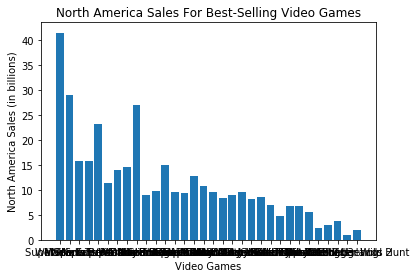

In [116]:
# Plotting a histogram for the game name against it's North America Sale
import matplotlib
matplotlib.pyplot.bar(gamedf["Name"],gamedf["North America Sales"])
matplotlib.pyplot.ylabel('North America Sales (in billions)')
matplotlib.pyplot.xlabel('Video Games')
matplotlib.pyplot.title('North America Sales For Best-Selling Video Games')


In [80]:
apidict=[]
for i in gameList:
    g = rawg.search(i)
    h = g[0].populate()
    desc = g[0].description
    apidict.append({"Name": i, "Description":desc})

In [105]:
apidict[0]['Description']

'<p>One of the most popular games of the 2010s, Minecraft allows you to rebuild the environment around you. The world of the game is open, infinitely wide, and procedurally generated. It is composed of small 3D cubes that represent specific types of materials or terrain. The gameplay is centered on mining and building various structures of your choice. You can also craft items like tools, weapons, and armor. There&#39;s an option to shift to the first or the third person view.<br />\nMinecraft includes multiple modes that dramatically change the focus of the game. Survival and Adventure modes require the player to gather resources, hunt for food and fight monsters to survive. In the Hardcore mode, there’s even permanent death. Creative mode, by contrast, offers you to freely explore the world and construct whatever you want with unlimited resources. There’s also a multiplayer mode that allows the players to share their worlds and engage in the traditional MMO activities, such as player

In [81]:
pd.DataFrame(apidict)

,Name,Description
0,Minecraft,"<p>One of the most popular games of the 2010s,..."
1,Tetris,<p>Tetris (Russian: Тетрис [ˈtɛtrʲɪs]) is a ti...
2,Grand Theft Auto V,"<p>Rockstar Games went bigger, since their pre..."
3,Wii Sports,<p>This is what video games should be: fun for...
4,PlayerUnknown's Battlegrounds,<p>PLAYERUNKNOWN’S BATTLEGROUNDS is battle-roy...
5,Super Mario Bros.,<p>Mario and Luigi star in their first ever Mu...
6,Pokémon Red/Green/Blue/Yellow,"<p>With classic graphics and music, Pokémon Re..."
7,Wii Fit and Wii Fit Plus,<p>\n Already have a Wii Balance Board™? ...
8,Mario Kart Wii,
9,Wii Sports Resort,"<p>Wii Sports Resort is an immersive, expansiv..."


## Conceptual Diagram

A conceptual data model is a summary-level data model that is most often used on strategic data projects. It typically describes an entire enterprise. The purpose is to organize, scope and define business concepts and rules. The main aim of this model is to establish the entities, their attributes, and their relationships. In this Data modeling level, there is hardly any detail available of the actual Database structure. 
1. Entity: A real-world object. In our dataset entities are the dataset extracted from three sources i.e selling data of a video game, publisher data, and Sales data of the game.
2. Attribute: Characteristics or properties of an entity. For selling games of all times, it's attributes are name, sales, platform, developers and publishers
3. Relationship: Dependency or association between two entities.

<br>
<center>
<img src = "ConceptualDiagram.jpeg" width = "400" >
</center>

Thank You